## __Wine Quality Dataset: Implementation of LDA, PCA and SVC for classification__

- Using the `load_wine` dataset from sklearn.
- Goal is to predict the wine quality.
- We will use `SVC` classifier for the classification.

In [85]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.svm import SVC
import time
from sklearn.datasets import load_wine

In [126]:
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [87]:
data.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [89]:
# Displaying descriptive statistics of the DataFrame, such as mean, std, min, max, and so on.
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [90]:
column_names = df.columns
column_names = column_names.to_list()
column_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [91]:
# Check for missing values
missing_values = df.isna().sum()
missing_values

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [92]:
# Check for duplicate values
duplicate_values = df.duplicated().sum()
duplicate_values

0

In [93]:
# Extract the feature(s) and target variables - X, y
X = df.iloc[: ,:13]

df['target'] = pd.Series(data.target)
y = df['target']

In [127]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [128]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [94]:
# Standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

### __Perform LDA on the whole dataset and visualize the results__

- Performing LDA by reducing the dimensions to 2 (`first 2 linear discriminants`).

In [95]:
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_std, y)

In [96]:
X_lda.shape

(178, 2)

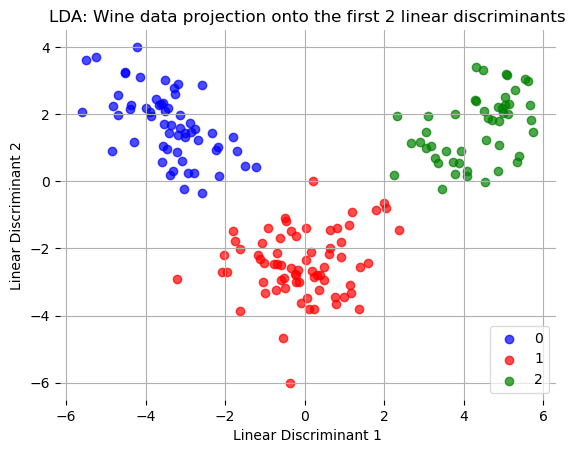

In [97]:
def plot_step_lda():
    fig = plt.figure()
    
    ax = plt.subplot(111)
    
    for label,color in zip(
        range(0,3),('blue', 'red', 'green')):

        plt.scatter(x=X_lda[:,0].real[y == label],
                    y=X_lda[:,1].real[y == label],
                    color=color,
                    alpha=0.7,
                    label=label
                   )
       
    plt.xlabel('Linear Discriminant 1')
    plt.ylabel('Linear Discriminant 2')
    
    leg = plt.legend(loc='lower right')
    leg.get_frame().set_alpha(0.7)
    plt.title('LDA: Wine data projection onto the first 2 linear discriminants')
 
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.show()

plot_step_lda()

### __Perform PCA on the whole dataset and visualize the results__

- Performing PCA by reducing the dimensions to 2 (`first 2 principal components`).

In [98]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

In [99]:
X_pca.shape

(178, 2)

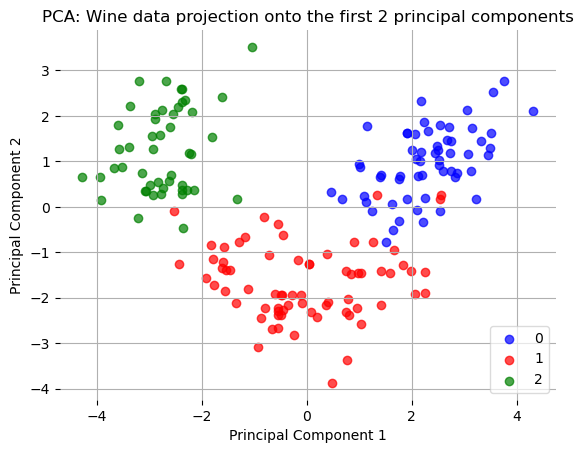

In [100]:
def plot_step_pca():
    fig = plt.figure()

    ax = plt.subplot(111)
    for label,color in zip(
            range(0,3),('blue', 'red', 'green')):

            plt.scatter(x=X_pca[:,0].real[y == label],
                        y=X_pca[:,1].real[y == label],
                        color=color,
                        alpha=0.7,
                        label=label
                        )

    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')

    leg = plt.legend(loc='lower right', fancybox=True)
    leg.get_frame().set_alpha(0.7)
    plt.title("PCA: Wine data projection onto the first 2 principal components")
    
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.show() 

plot_step_pca()

### __Split the dataset into training and testing sets and peform LDA and PCA__

- Split the datasets.
- Perform standardization.
- Perform LDA with 2 *linear discriminants* and store the respective results from the training and testing parts.
- Perform PCA with 2 *principal components* and store the respective results from the training and testing parts.
- Define the SVC classifier.

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [102]:
# Standardize the data
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [103]:
lda = LDA(n_components = 2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

In [104]:
pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [115]:
svclassifier = SVC(kernel='linear')

### __Run the classifier through the LDA train and test sets and return the neccessary time for training and testing.__

In [116]:
def train_test_lda():
    s=[]
    start_train_lda=time.time()
    svclassifier.fit(X_train_lda,y_train)
    finish_train_lda=time.time()
    
    start_test_lda=time.time()
    y_pred_lda=svclassifier.predict(X_test_lda)
    finish_test_lda=time.time()
  
    s.append(finish_train_lda-start_train_lda)
    s.append(finish_test_lda-start_test_lda)
    s.append(y_pred_lda)

    return s

### __Run the classifier through the PCA train and test sets and return the neccessary time for training and testing.__

In [107]:
def train_test_pca():
    l=[]
    start_train_pca=time.time()
    svclassifier.fit(X_train_pca,y_train)
    finish_train_pca=time.time()
    
    start_test_pca=time.time()
    y_pred_pca=svclassifier.predict(X_test_pca)
    finish_test_pca=time.time()
  
    l.append(finish_train_pca-start_train_pca)
    l.append(finish_test_pca-start_test_pca)
    l.append(y_pred_pca)
    
    return l

### __Analysis of the Training and Testing Times for the Classifier and Its Accuracy__

In [119]:
train_lda=0
test_lda=0

for i in range(10):
    
    c=train_test_lda()
    train_lda += c[0]
    test_lda += c[1]
    
print(f'Average time for training out of 10 runs for LDA:{train_lda/10:.5f}')
print(f'Average time for testing out of 10 runs for LDA:{test_lda/10:.5f}')

Average time for training out of 10 runs for LDA:0.00199
Average time for testing out of 10 runs for LDA:0.00032


In [120]:
train_pca=0
test_pca=0

for i in range(10):
    
    m=train_test_pca()
    train_pca += m[0]
    test_pca += m[1]

print(f'Average time for training out of 10 runs for PCA:{train_pca/10:.5f}')
print(f'Average time for testing out of 10 runs for PCA:{test_pca/10:.5f}')

Average time for training out of 10 runs for PCA:0.00150
Average time for testing out of 10 runs for PCA:0.00023


In [121]:
a = train_test_lda()
b = train_test_pca()

In [122]:
cm_lda = confusion_matrix(y_test, a[2])
print('Confusion matrix for LDA:\n')
print(cm_lda)

Confusion matrix for LDA:

[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]


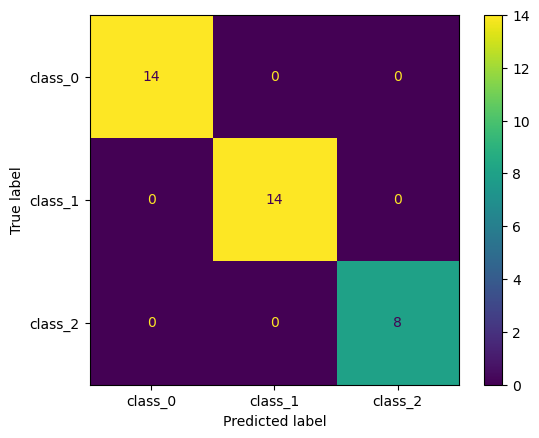



LDA Accuracy: 1.0


In [123]:
# Heatmap visualization for confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm_lda, display_labels = data.target_names)

# display matrix
cm_display.plot()
plt.show()

print('\n')
print('LDA Accuracy:'+' '+ str(accuracy_score(y_test,a[2])))

In [124]:
cm_pca = confusion_matrix(y_test, b[2])
print('Confusion matrix for PCA:\n')
print(cm_pca)

Confusion matrix for PCA:

[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]


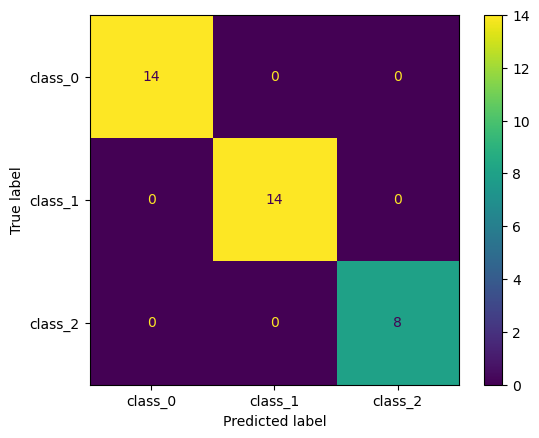



PCA Accuracy: 1.0


In [125]:
# Heatmap visualization for confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm_pca, display_labels = data.target_names)

# display matrix
cm_display.plot()
plt.show()

print('\n')
print('PCA Accuracy:'+' '+ str(accuracy_score(y_test,b[2])))